In [18]:
#TJ import needed packages
import dustmaps
from dustmaps.config import config
from astropy.coordinates import SkyCoord
from dustmaps.sfd import SFDQuery
import matplotlib.pyplot as plt
import astropy.units as u
import numpy as np
dustdir = "/d/scratch/ASTR5160/data/dust/v0_1/maps" #TJ set directory for dust files
ra, dec = '12h42m30s', '+41d12m00s' #TJ assign test RA and dec to make sure this works
c = SkyCoord(ra, dec).galactic #TJ conver RA and dec into galactic l,b values
config["data_dir"] = dustdir #TJ extract config from file
sfd = SFDQuery() #TJ Define shorter function
sfd(c) #TJ The answer should be 0.016697595

0.016697595

They do not have the same color, I'm not sure why they would necessarily be expected to have the same color. Color depends on gas 
composition, mass, etc that we aren't given


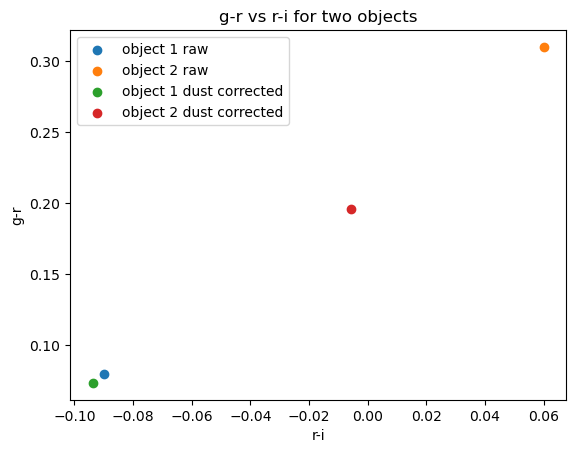

In [29]:
#Python task #1 Quasar objects
#TJ values for (246.933, 40.795)object u 18.82 g 18.81 r 18.73 i 18.82 z 18.90
#TJ (236.562,2.440) u 19.37 g 19.10 r 18.79 i 18.73 z 18.63
o1_RA,o1_Dec = 246.933*u.deg, 40.795*u.deg #TJ assign RA and dec values
o2_RA, o2_Dec = 236.562*u.deg, 2.440*u.deg
o1_loc = SkyCoord(o1_RA,o1_Dec) #TJ create SkyCoord locations for each object
o2_loc = SkyCoord(o2_RA,o2_Dec)
o1_ext = sfd(o1_loc) #TJ Extract extinction values for each object
o2_ext = sfd(o2_loc)
o1u ,o1g ,o1r , o1i, o1z =  18.82, 18.81, 18.73, 18.82, 18.90 #TJ assign variables for object one values
o2u ,o2g ,o2r , o2i, o2z =  19.37, 19.10, 18.79, 18.73, 18.63  #TJ assign variables for object two values
plt.scatter(o1r-o1i,o1g-o1r, label = 'object 1 raw') #TJ plot g-r vs r-i for each object
plt.scatter(o2r-o2i,o2g-o2r, label = 'object 2 raw')
print("They do not have the same color, I'm not sure why they would necessarily be expected to have the same color. Color depends on gas \ncomposition, mass, etc that we aren't given")
ugriz = np.array([4.239 ,3.303 , 2.285 , 1.698 , 1.263])
#TJ correct for dust
o1u_corrected ,o1g_corrected ,o1r_corrected , o1i_corrected, o1z_corrected = o1u-(ugriz[0]*o1_ext) ,o1g-(ugriz[1]*o1_ext) ,o1r-(ugriz[2]*o1_ext), o1i-(ugriz[3]*o1_ext), o1z-(ugriz[4]*o1_ext)
o2u_corrected ,o2g_corrected ,o2r_corrected , o2i_corrected, o2z_corrected = o2u-(ugriz[0]*o2_ext) ,o2g-(ugriz[1]*o2_ext) ,o2r-(ugriz[2]*o2_ext), o2i-(ugriz[3]*o2_ext), o2z-(ugriz[4]*o2_ext)
plt.scatter(o1r_corrected-o1i_corrected, o1g_corrected-o1r_corrected, label = 'object 1 dust corrected')
plt.scatter(o2r_corrected-o2i_corrected, o2g_corrected-o2r_corrected, label = 'object 2 dust corrected')
plt.title('g-r vs r-i for two objects')
plt.xlabel('r-i')
plt.ylabel('g-r')
plt.legend()
plt.show()
print('Their colors are now closer to each other, but still noticeably different') 





In [37]:
#Python task #2 Visualize dust in each region
#generate grids with step size according to instructions
array_obj1 = np.meshgrid(246.9+np.linspace(-5,5,101)*1.3,40.8+np.linspace(-5,5,101)) #TJ make a 100 by 100 grid
array_obj2 = np.meshgrid(236.6+np.linspace(-5,5,101),2.4+np.linspace(-5,5,101)) #TJ make a 100 by 100 grid


[array([[240.4 , 240.53, 240.66, ..., 253.14, 253.27, 253.4 ],
       [240.4 , 240.53, 240.66, ..., 253.14, 253.27, 253.4 ],
       [240.4 , 240.53, 240.66, ..., 253.14, 253.27, 253.4 ],
       ...,
       [240.4 , 240.53, 240.66, ..., 253.14, 253.27, 253.4 ],
       [240.4 , 240.53, 240.66, ..., 253.14, 253.27, 253.4 ],
       [240.4 , 240.53, 240.66, ..., 253.14, 253.27, 253.4 ]]), array([[35.8, 35.8, 35.8, ..., 35.8, 35.8, 35.8],
       [35.9, 35.9, 35.9, ..., 35.9, 35.9, 35.9],
       [36. , 36. , 36. , ..., 36. , 36. , 36. ],
       ...,
       [45.6, 45.6, 45.6, ..., 45.6, 45.6, 45.6],
       [45.7, 45.7, 45.7, ..., 45.7, 45.7, 45.7],
       [45.8, 45.8, 45.8, ..., 45.8, 45.8, 45.8]])]


[array([[231.6, 231.7, 231.8, ..., 241.4, 241.5, 241.6],
        [231.6, 231.7, 231.8, ..., 241.4, 241.5, 241.6],
        [231.6, 231.7, 231.8, ..., 241.4, 241.5, 241.6],
        ...,
        [231.6, 231.7, 231.8, ..., 241.4, 241.5, 241.6],
        [231.6, 231.7, 231.8, ..., 241.4, 241.5, 241.6],
        [231.6, 231.7, 231.8, ..., 241.4, 241.5, 241.6]]),
 array([[-2.6, -2.6, -2.6, ..., -2.6, -2.6, -2.6],
        [-2.5, -2.5, -2.5, ..., -2.5, -2.5, -2.5],
        [-2.4, -2.4, -2.4, ..., -2.4, -2.4, -2.4],
        ...,
        [ 7.2,  7.2,  7.2, ...,  7.2,  7.2,  7.2],
        [ 7.3,  7.3,  7.3, ...,  7.3,  7.3,  7.3],
        [ 7.4,  7.4,  7.4, ...,  7.4,  7.4,  7.4]])]

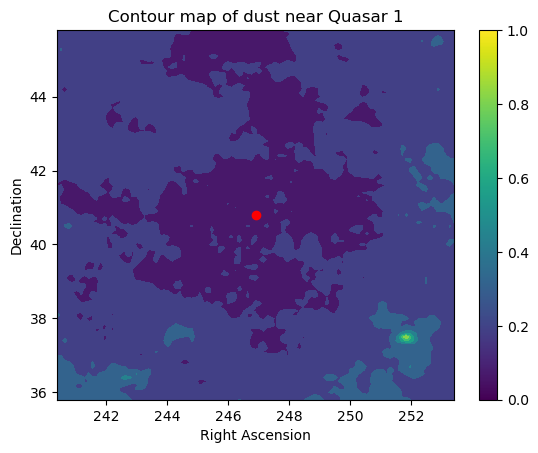

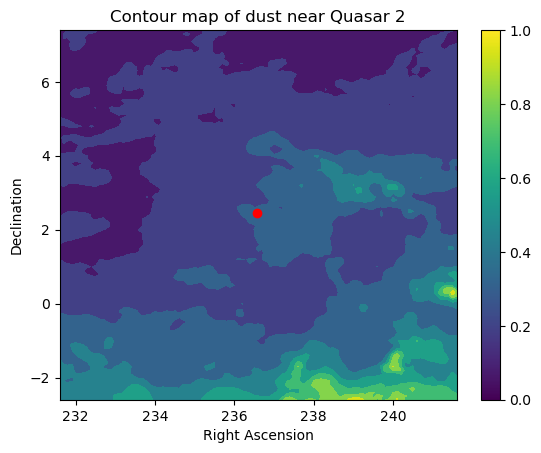

In [54]:
#Python task #3 Visualizing dust continued
dust_map_1 = sfd(SkyCoord(array_obj1[0]*u.deg,array_obj1[1]*u.deg))
plt.contourf(array_obj1[0],array_obj1[1],dust_map_1)
plt.scatter(o1_RA,o1_Dec,label = 'quasar #1', color = 'red')
plt.colorbar()
plt.xlabel('Right Ascension')
plt.ylabel('Declination')
plt.title('Contour map of dust near Quasar 1')
plt.show()

dust_map_2 = sfd(SkyCoord(array_obj2[0]*u.deg,array_obj2[1]*u.deg))
plt.contourf(array_obj2[0],array_obj2[1],dust_map_2)
plt.scatter(o2_RA,o2_Dec,label = 'quasar #2', color = 'red')
plt.colorbar()
plt.xlabel('Right Ascension')
plt.ylabel('Declination')
plt.title('Contour map of dust near Quasar 2')
plt.show()